In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Understanding the data

In [4]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
train_data.shape

(20000, 22)

In [6]:
train_data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [7]:
train_data.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [9]:
train_data.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

# EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

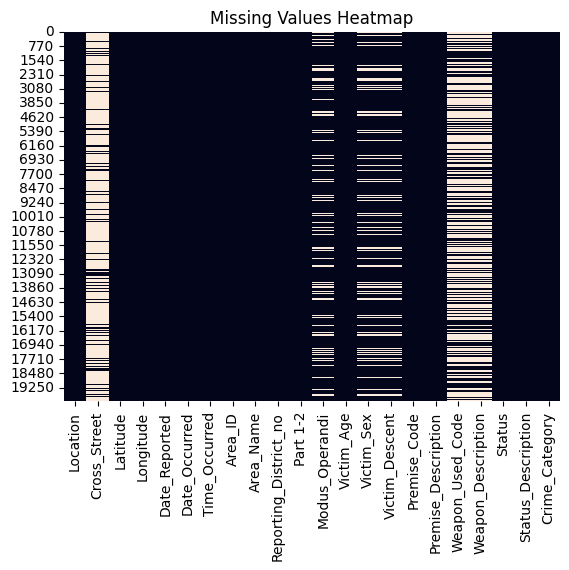

In [11]:
sns.heatmap(train_data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

It can be seen that cross_street, weapon_used_code, and weapon_description have very high number of null values. Weapon_description is not of much use as weapon_used_code is sufficient.

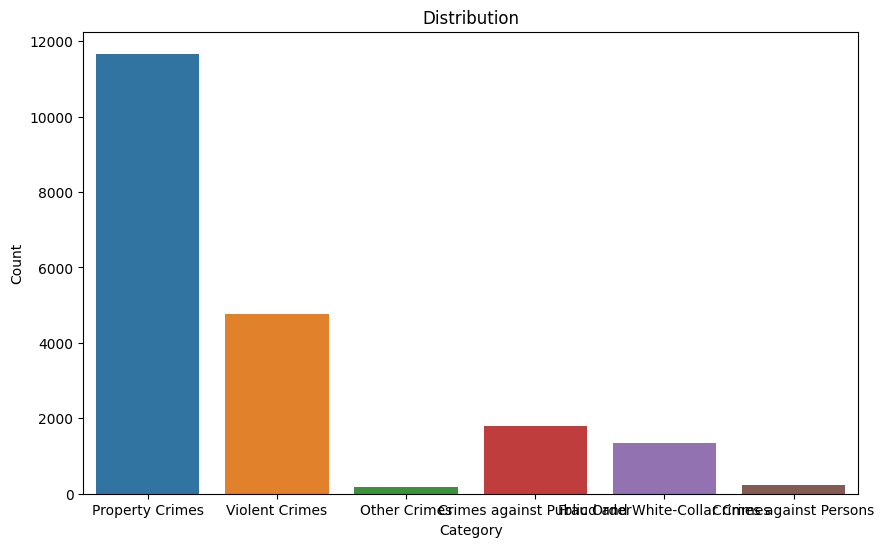

In [12]:
#Checking for data distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Crime_Category', data=train_data)
plt.title('Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

As we can see from the plot above, the distribution of data in the dataset is imbalanced. There are significant differences between the number of data containing each crime category.

In [13]:
train_data['Victim_Sex'].unique(), train_data['Victim_Descent'].unique()

(array(['M', 'X', 'F', nan, 'H'], dtype=object),
 array(['W', 'H', 'B', 'X', nan, 'O', 'A', 'K', 'C', 'F', 'I', 'J', 'Z',
        'V', 'P', 'D', 'U', 'G'], dtype=object))

In [14]:
train_data.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

Due to a very large number of null values in the Cross_Street column, Weapon_Used_Code, and Weapon_Description, it is better to remove these features from the dataset.

In [15]:
num_features = train_data.select_dtypes(exclude='object')
num_features.corr()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
Latitude,1.000000,-0.998910,0.005952,0.018411,0.017928,-0.036357,0.003195,-0.011293,-0.017656
Longitude,-0.998910,1.000000,-0.005361,-0.006480,-0.006139,0.036373,-0.002252,0.011205,0.019185
Time_Occurred,0.005952,-0.005361,1.000000,0.012346,0.012127,-0.028881,-0.017798,-0.057534,-0.016911
Area_ID,0.018411,-0.006480,0.012346,1.000000,0.999024,-0.002518,0.028966,0.004045,-0.027243
Reporting_District_no,0.017928,-0.006139,0.012127,0.999024,1.000000,-0.002108,0.028721,0.004121,-0.027117
Part 1-2,-0.036357,0.036373,-0.028881,-0.002518,-0.002108,1.000000,0.186780,0.254579,0.419642
Victim_Age,0.003195,-0.002252,-0.017798,0.028966,0.028721,0.186780,1.000000,0.191313,0.056768
Premise_Code,-0.011293,0.011205,-0.057534,0.004045,0.004121,0.254579,0.191313,1.000000,0.196771
Weapon_Used_Code,-0.017656,0.019185,-0.016911,-0.027243,-0.027117,0.419642,0.056768,0.196771,1.000000


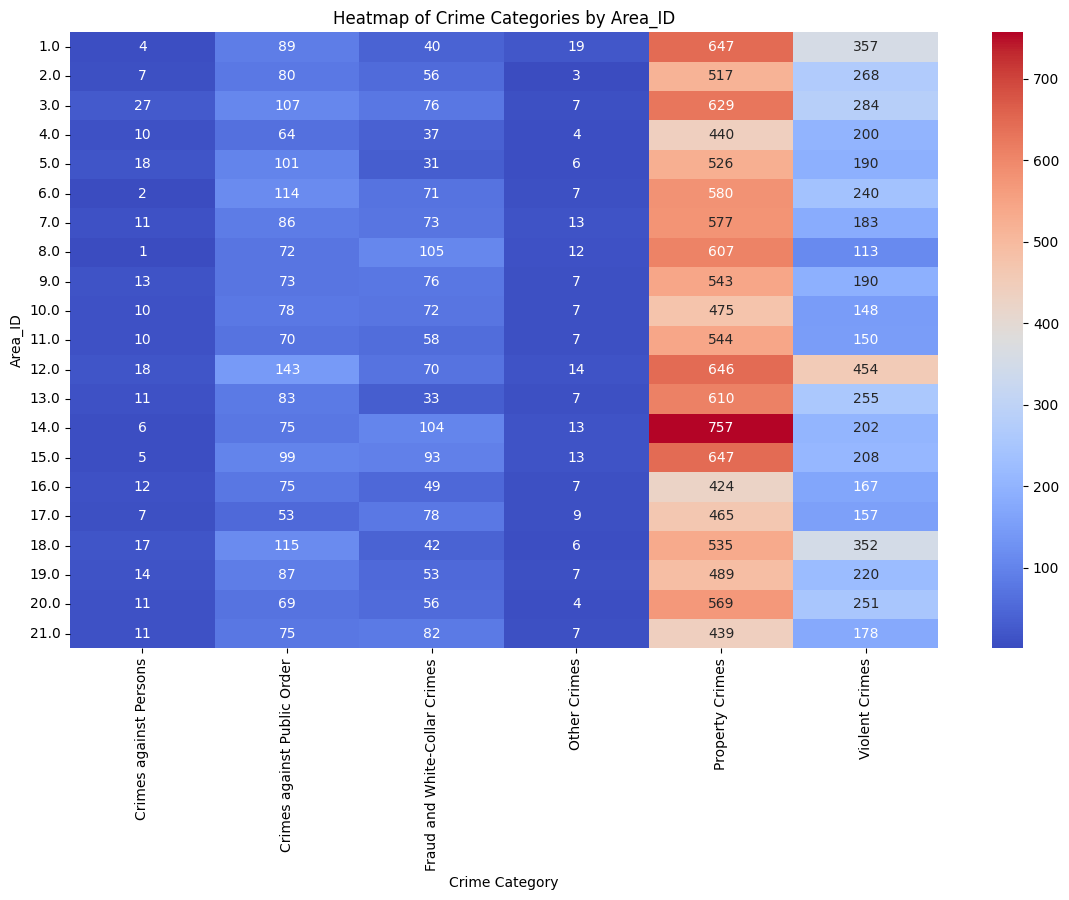

In [16]:
#Crime_category_count in each area
crime_heatmap_data = train_data.pivot_table(index='Area_ID', columns='Crime_Category', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(crime_heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Crime Categories by Area_ID')
plt.xlabel('Crime Category')
plt.ylabel('Area_ID')
plt.show()

The highest number of Property Crimes happen in area with Area_ID 14. Also Property Crimes are the most commonly occuring crimes.

# Data Preprocessing

In [17]:
#Dropping the Cross_Street Column
train_data = train_data.drop(columns=['Cross_Street','Weapon_Used_Code','Weapon_Description'])
test_data = test_data.drop(columns=['Cross_Street','Weapon_Used_Code','Weapon_Description'])

The rows with longitude and latitude both being zero must be removed from dataset. These are of no use and cause redundancy.

In [18]:
#Removing rows with lang and lat 0:
train_data = train_data[~((train_data['Latitude'] == 0) & (train_data['Longitude'] == 0))]

**Removing Columns of no use :**

In [19]:
train_data.drop(columns=['Location', 'Area_Name', 'Premise_Description','Status','Date_Reported', 'Status_Description'], inplace=True)
test_data.drop(columns=['Location', 'Area_Name', 'Premise_Description','Status','Date_Reported', 'Status_Description'], inplace=True)

In [20]:
train_data.isna().sum()

Latitude                    0
Longitude                   0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi           2740
Victim_Age                  0
Victim_Sex               2624
Victim_Descent           2624
Premise_Code                0
Crime_Category              0
dtype: int64

**Handling illogical values from each columns :**

In [21]:
train_data.shape

(19922, 13)

In [22]:
#Victim_Age (Replacing negative values with np.nan)
train_data['Victim_Age'] = train_data['Victim_Age'].apply(lambda x: np.nan if x<0 else x)
test_data['Victim_Age'] = test_data['Victim_Age'].apply(lambda x: np.nan if x<0 else x)

In [23]:
mean = train_data['Victim_Age'].mean()
train_data['Victim_Age'] = train_data['Victim_Age'].replace(np.nan, mean)

In [24]:
mean = train_data['Victim_Age'].mean()
test_data['Victim_Age'] = test_data['Victim_Age'].replace(np.nan, mean)

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               5000 non-null   float64
 1   Longitude              5000 non-null   float64
 2   Date_Occurred          5000 non-null   object 
 3   Time_Occurred          5000 non-null   float64
 4   Area_ID                5000 non-null   float64
 5   Reporting_District_no  5000 non-null   float64
 6   Part 1-2               5000 non-null   float64
 7   Modus_Operandi         4316 non-null   object 
 8   Victim_Age             5000 non-null   float64
 9   Victim_Sex             4357 non-null   object 
 10  Victim_Descent         4357 non-null   object 
 11  Premise_Code           5000 non-null   float64
dtypes: float64(8), object(4)
memory usage: 468.9+ KB


**Checking for Outliers**

In [26]:
# def remove_outliers(df,col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3-Q1
#     lower_bound = Q1-1.5*IQR
#     upper_bound = Q3+1.5*IQR
#     df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
#     return df

****Removing Outliers****

In [27]:
# num_col = train_data.select_dtypes(exclude='object').columns
# for col in num_col:
#     train_data = remove_outliers(train_data,col)

In [28]:
# num_col = test_data.select_dtypes(exclude='object').columns
# for col in num_col:
#     test_data = remove_outliers(test_data,col)

In [29]:
train_data.shape

(19922, 13)

In [30]:
train_data.head()

,Latitude,Longitude,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Crime_Category
0,34.1522,-118.3910,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,Property Crimes
1,34.0028,-118.2391,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,Property Crimes
2,34.0111,-118.2653,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,Property Crimes
3,34.2953,-118.4590,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,Property Crimes
4,33.9787,-118.2918,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,Property Crimes


# Feature Engineering

**Handling Date-time Data**

In [31]:
def handle_date(train_data):
    train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'])

    train_data['Year_Occurred'] = train_data['Date_Occurred'].dt.year
    train_data['Month_Occurred'] = train_data['Date_Occurred'].dt.month
    train_data['Day_Occurred'] = train_data['Date_Occurred'].dt.day
    train_data['Weekday_Occurred'] = train_data['Date_Occurred'].dt.weekday
    
    train_data['Hour_Occurred'] = train_data['Time_Occurred'].apply(lambda x: int(x // 100))
    
    return train_data

In [32]:
train_data = handle_date(train_data)
test_data = handle_date(test_data)

**Some more Data analysis using the date-time data :**

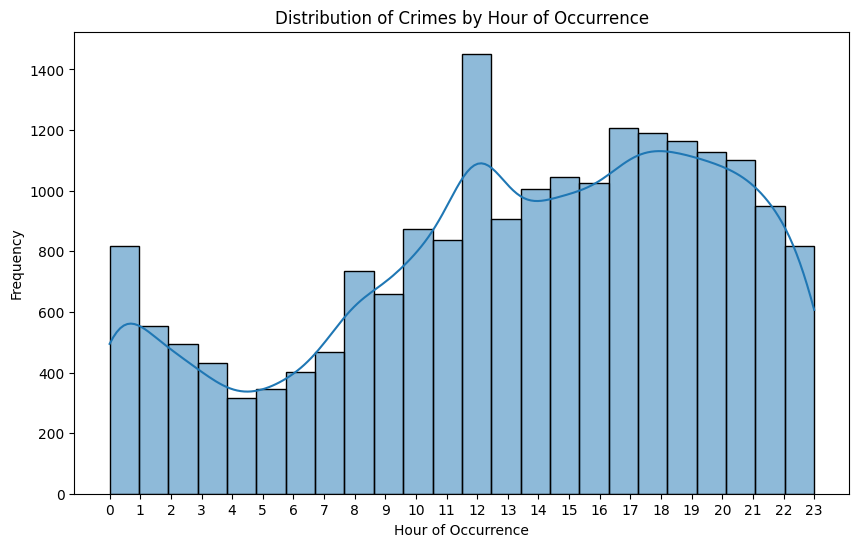

In [33]:
#Histogram showing the frequency of crimes at each hour of day.
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Hour_Occurred'], bins=24, kde=True)
plt.title('Distribution of Crimes by Hour of Occurrence')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.show()

It is clear from this histogram that the crime occurrence is at its peak on the 12th hour of the day. Also the skewness toward right shows the crimes occur more after 12PM.

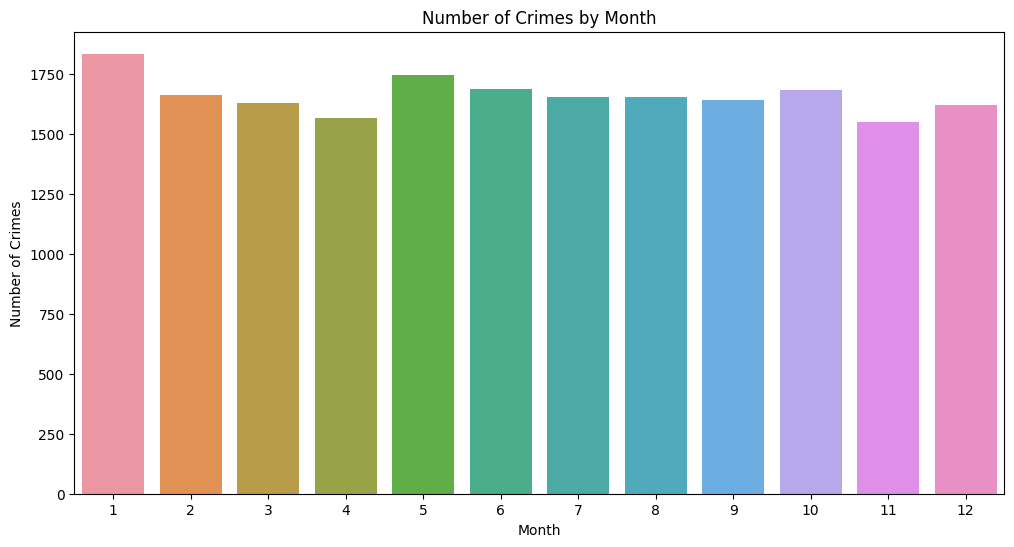

In [34]:
#Monthly trend of crime
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Month_Occurred')
plt.title('Number of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

The monthly trend shows that the crime was at its peak in Jan, then started decreasing till Apr. Again got an increase in May and thereafter decreased till Sept. Once again grew in Oct and decreased till Dec.

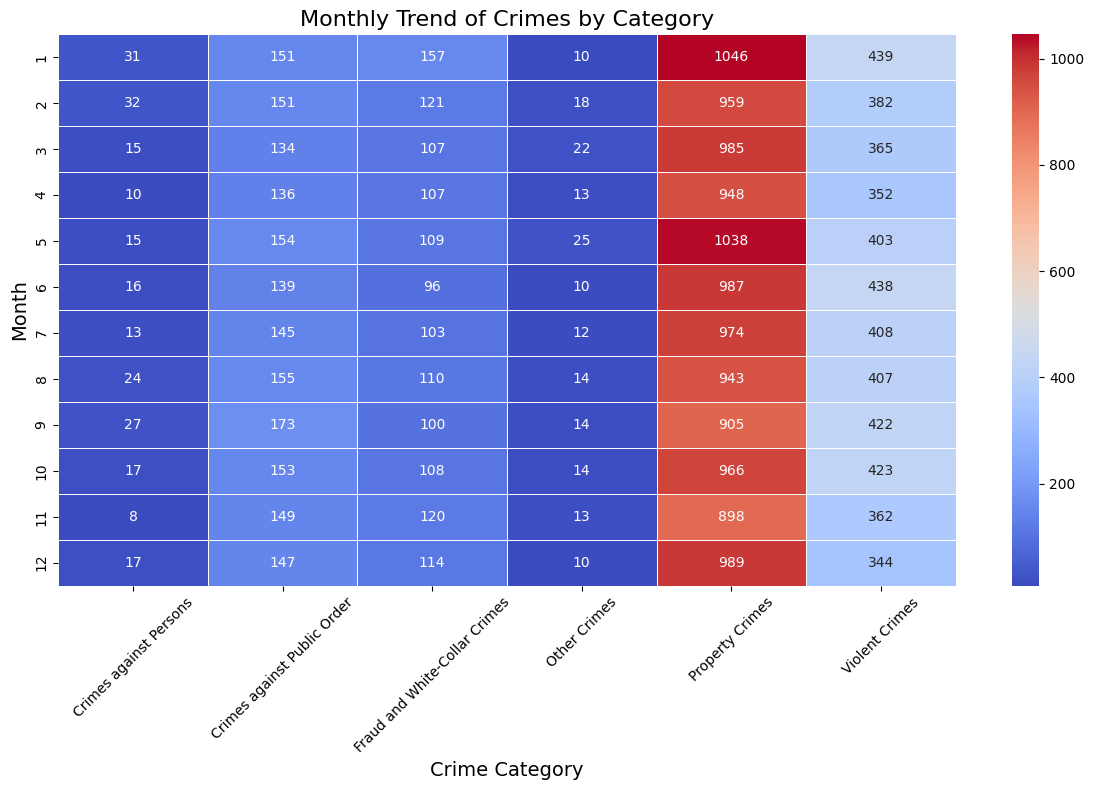

In [35]:
monthly_crime_counts = train_data.groupby(['Month_Occurred', 'Crime_Category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_crime_counts, cmap="coolwarm", annot=True, fmt='d', linewidths=0.5)

plt.title('Monthly Trend of Crimes by Category', size=16)
plt.xlabel('Crime Category', size=14)
plt.ylabel('Month', size=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This heatmap shows the monthly trend of crimes by category. The first thing we can see, the maximum number of crimes was occurred in Jan and that too were property crimes. And minimum number of crimes occurred in the month of Nov. Also the minimum number of crimes that occurred over the year was Crimes against persons.

In [36]:
train_data.drop(columns=['Date_Occurred','Time_Occurred','Weekday_Occurred','Year_Occurred'], inplace=True)
test_data.drop(columns=['Date_Occurred','Time_Occurred','Weekday_Occurred','Year_Occurred'], inplace=True)

**Modus_Operandi**

Since each records in Modus_Operandi column has one or more codes. Let's convert the records from string to a list of codes. 

In [37]:
train_data.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Crime_Category,Month_Occurred,Day_Occurred,Hour_Occurred
0,34.1522,-118.3910,15.0,1563.0,1.0,0385,75.0,M,W,101.0,Property Crimes,3,6,18
1,34.0028,-118.2391,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,Property Crimes,2,27,13
2,34.0111,-118.2653,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,Property Crimes,8,21,6
3,34.2953,-118.4590,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,Property Crimes,11,6,18
4,33.9787,-118.2918,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,Property Crimes,2,25,11


In [38]:
train_data['Modus_Operandi'] = train_data['Modus_Operandi'].apply(lambda x: str(x).split(' ') if x else np.nan)
test_data['Modus_Operandi'] = test_data['Modus_Operandi'].apply(lambda x: str(x).split(' ') if x else np.nan)

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin

class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ml_binarizers = {}
        self.all_classes = {}

    def fit(self, X, y=None):
        for column in X.columns:
            mlb = MultiLabelBinarizer()
            mlb.fit(X[column])
            self.ml_binarizers[column] = mlb
            self.all_classes[column] = mlb.classes_
        return self

    def transform(self, X, y=None):
        X_transformed = []
        for column in X.columns:
            mlb = self.ml_binarizers[column]
            transformed_data = mlb.transform(X[column])
            df_transformed = pd.DataFrame(transformed_data, columns=self.all_classes[column])
            X_transformed.append(df_transformed)
        return pd.concat(X_transformed, axis=1)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19922 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               19922 non-null  float64
 1   Longitude              19922 non-null  float64
 2   Area_ID                19922 non-null  float64
 3   Reporting_District_no  19922 non-null  float64
 4   Part 1-2               19922 non-null  float64
 5   Modus_Operandi         19922 non-null  object 
 6   Victim_Age             19922 non-null  float64
 7   Victim_Sex             17298 non-null  object 
 8   Victim_Descent         17298 non-null  object 
 9   Premise_Code           19922 non-null  float64
 10  Crime_Category         19922 non-null  object 
 11  Month_Occurred         19922 non-null  int32  
 12  Day_Occurred           19922 non-null  int32  
 13  Hour_Occurred          19922 non-null  int64  
dtypes: float64(7), int32(2), int64(1), object(4)
memory usage: 

# Model

In [41]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn import ensemble, svm


In [42]:
X = train_data.drop(columns=['Crime_Category'])
y = train_data['Crime_Category']

In [43]:
le = LabelEncoder()
y = le.fit_transform(y)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
X_train.shape, X_val.shape

((15937, 13), (3985, 13))

**Pipeline**

In [46]:
gender_pipe = Pipeline([('impute', SimpleImputer(strategy='most_frequent')),
                       ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

**ColumnTransformer**

In [47]:
transformer = ColumnTransformer(
    transformers=[
        ("OHE", OneHotEncoder(handle_unknown='ignore'), ['Area_ID', 'Reporting_District_no', 'Part 1-2', 'Premise_Code']),
        ("OE", gender_pipe, ['Victim_Sex', 'Victim_Descent']),
        ('modus_operandi', MultiLabelBinarizerTransformer(),['Modus_Operandi']),
        ("minmax", MinMaxScaler(), ['Latitude', 'Longitude', 'Victim_Age'])
    ],
    remainder='drop'
)

In [48]:
X_train_transformed = transformer.fit_transform(X_train)
X_val_transformed = transformer.transform(X_val)

In [49]:
def plot_confusion_matrix(y_true, y_pred):
    classes = le.classes_
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    plt.figure(figsize=(10, 7))
    disp.plot(cmap='Blues', values_format='d')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

In [50]:
# BaggingClassifier
pipeline_bagging = Pipeline(steps=[
    ('preprocessor', transformer),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', ensemble.BaggingClassifier(random_state=42))
])
pipeline_bagging.fit(X_train, y_train)
y_pred_bagging = pipeline_bagging.predict(X_val)
print("BaggingClassifier Model:")
print("Accuracy:", accuracy_score(y_val, y_pred_bagging))
print("Classification Report:\n", classification_report(y_val, y_pred_bagging))

BaggingClassifier Model:
Accuracy: 0.9377666248431619
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.60      0.68        45
           1       0.77      0.84      0.81       358
           2       0.90      0.93      0.91       270
           3       0.40      0.17      0.24        35
           4       0.98      0.98      0.98      2328
           5       0.92      0.92      0.92       949

    accuracy                           0.94      3985
   macro avg       0.79      0.74      0.76      3985
weighted avg       0.94      0.94      0.94      3985



This model performs well for classes with higher prevalence and classifies some classes with high precision and recall.

<Figure size 1000x700 with 0 Axes>

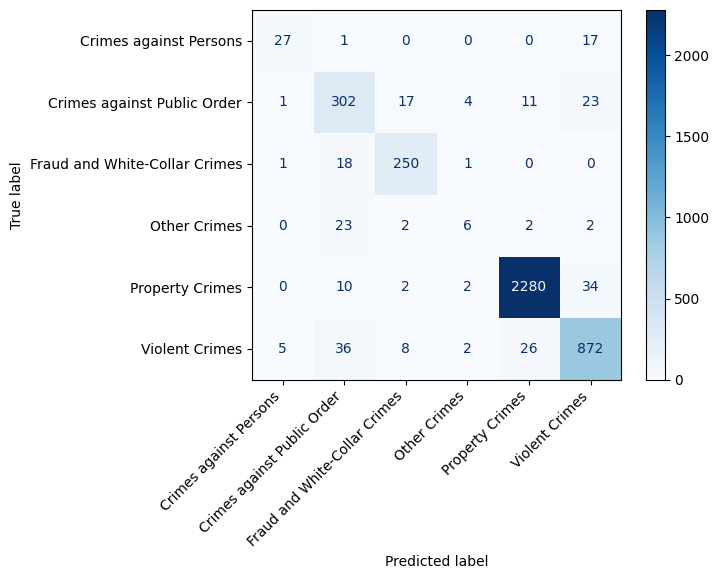

In [51]:
#Confusion Matrix for BaggingClassifier
plot_confusion_matrix(y_val, y_pred_bagging)

In [52]:
# warnings.filterwarnings("ignore")
# # Using BaggingClassifier with hypertuning
# pipeline_bagging = Pipeline(steps=[
#     ('preprocessor', transformer),
#     ('classifier', ensemble.BaggingClassifier(random_state=42))
# ])
# param_grid_bagging = {
#     'classifier__n_estimators': [50, 100],
#     'classifier__max_samples': [0.7, 1.0], 
#     'classifier__max_features': [0.7, 1.0],  
#     'classifier__bootstrap': [True] 
# }
# grid_search_bagging = GridSearchCV(pipeline_bagging, param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_bagging.fit(X_train, y_train)

# print("Best parameters found: ", grid_search_bagging.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search_bagging.best_score_))

# best_model_bagging = grid_search_bagging.best_estimator_
# y_pred_bagging = best_model_bagging.predict(X_val)
# print("\nValidation Set Classification Report:\n", classification_report(y_val, y_pred_bagging))
# print("Validation Set Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred_bagging)))

In [53]:
# Using SVC
svc = Pipeline(steps=[
    ('preprocessor', transformer),
    ('classifier', svm.SVC(probability=True, random_state=42))
])
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred_svc))
print("Classification Report:\n", classification_report(y_val, y_pred_svc))

Accuracy: 0.9227101631116688
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.11      0.20        45
           1       0.77      0.73      0.75       358
           2       0.87      0.95      0.91       270
           3       0.00      0.00      0.00        35
           4       0.97      0.98      0.98      2328
           5       0.87      0.92      0.89       949

    accuracy                           0.92      3985
   macro avg       0.72      0.62      0.62      3985
weighted avg       0.91      0.92      0.91      3985



<Figure size 1000x700 with 0 Axes>

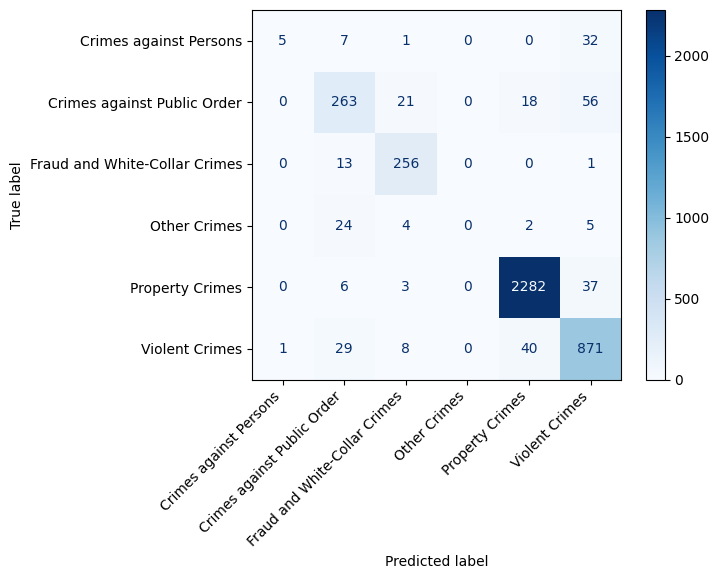

In [54]:
plot_confusion_matrix(y_val, y_pred_svc)

In [55]:
# #Using XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_transformed, y_train)
y_pred_xgb = xgb_model.predict(X_val_transformed)

print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))

Accuracy: 0.9500627352572145
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        45
           1       0.84      0.85      0.84       358
           2       0.93      0.95      0.94       270
           3       0.56      0.26      0.35        35
           4       0.99      0.98      0.98      2328
           5       0.93      0.94      0.94       949

    accuracy                           0.95      3985
   macro avg       0.83      0.77      0.79      3985
weighted avg       0.95      0.95      0.95      3985



The XGBclassifier performs well overall but has difficulty with Other Crimes. Due to class imbalance or insufficient feature representation. Property Crimes and Violent crimes are handled very effectively, indicating that it is capable of high performance when class is well represented in the dataset.

<Figure size 1000x700 with 0 Axes>

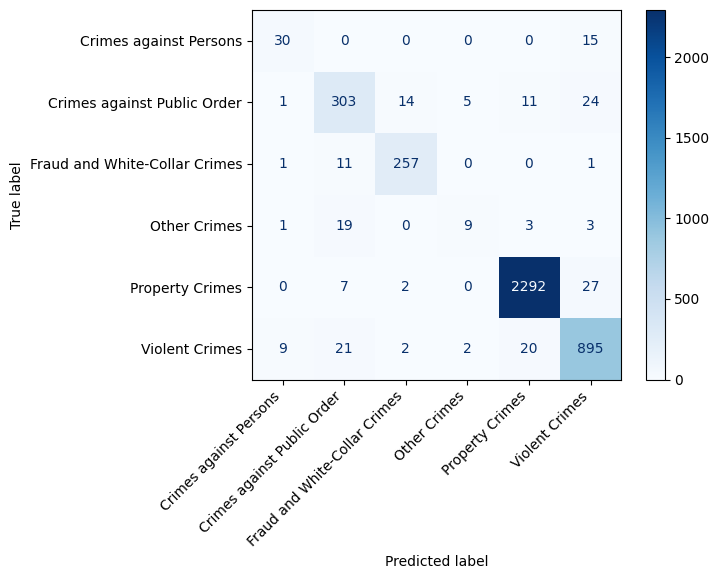

In [56]:
plot_confusion_matrix(y_val, y_pred_xgb)

In [57]:
# cv_scores = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='accuracy')
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", cv_scores.mean())

# Model Comparison


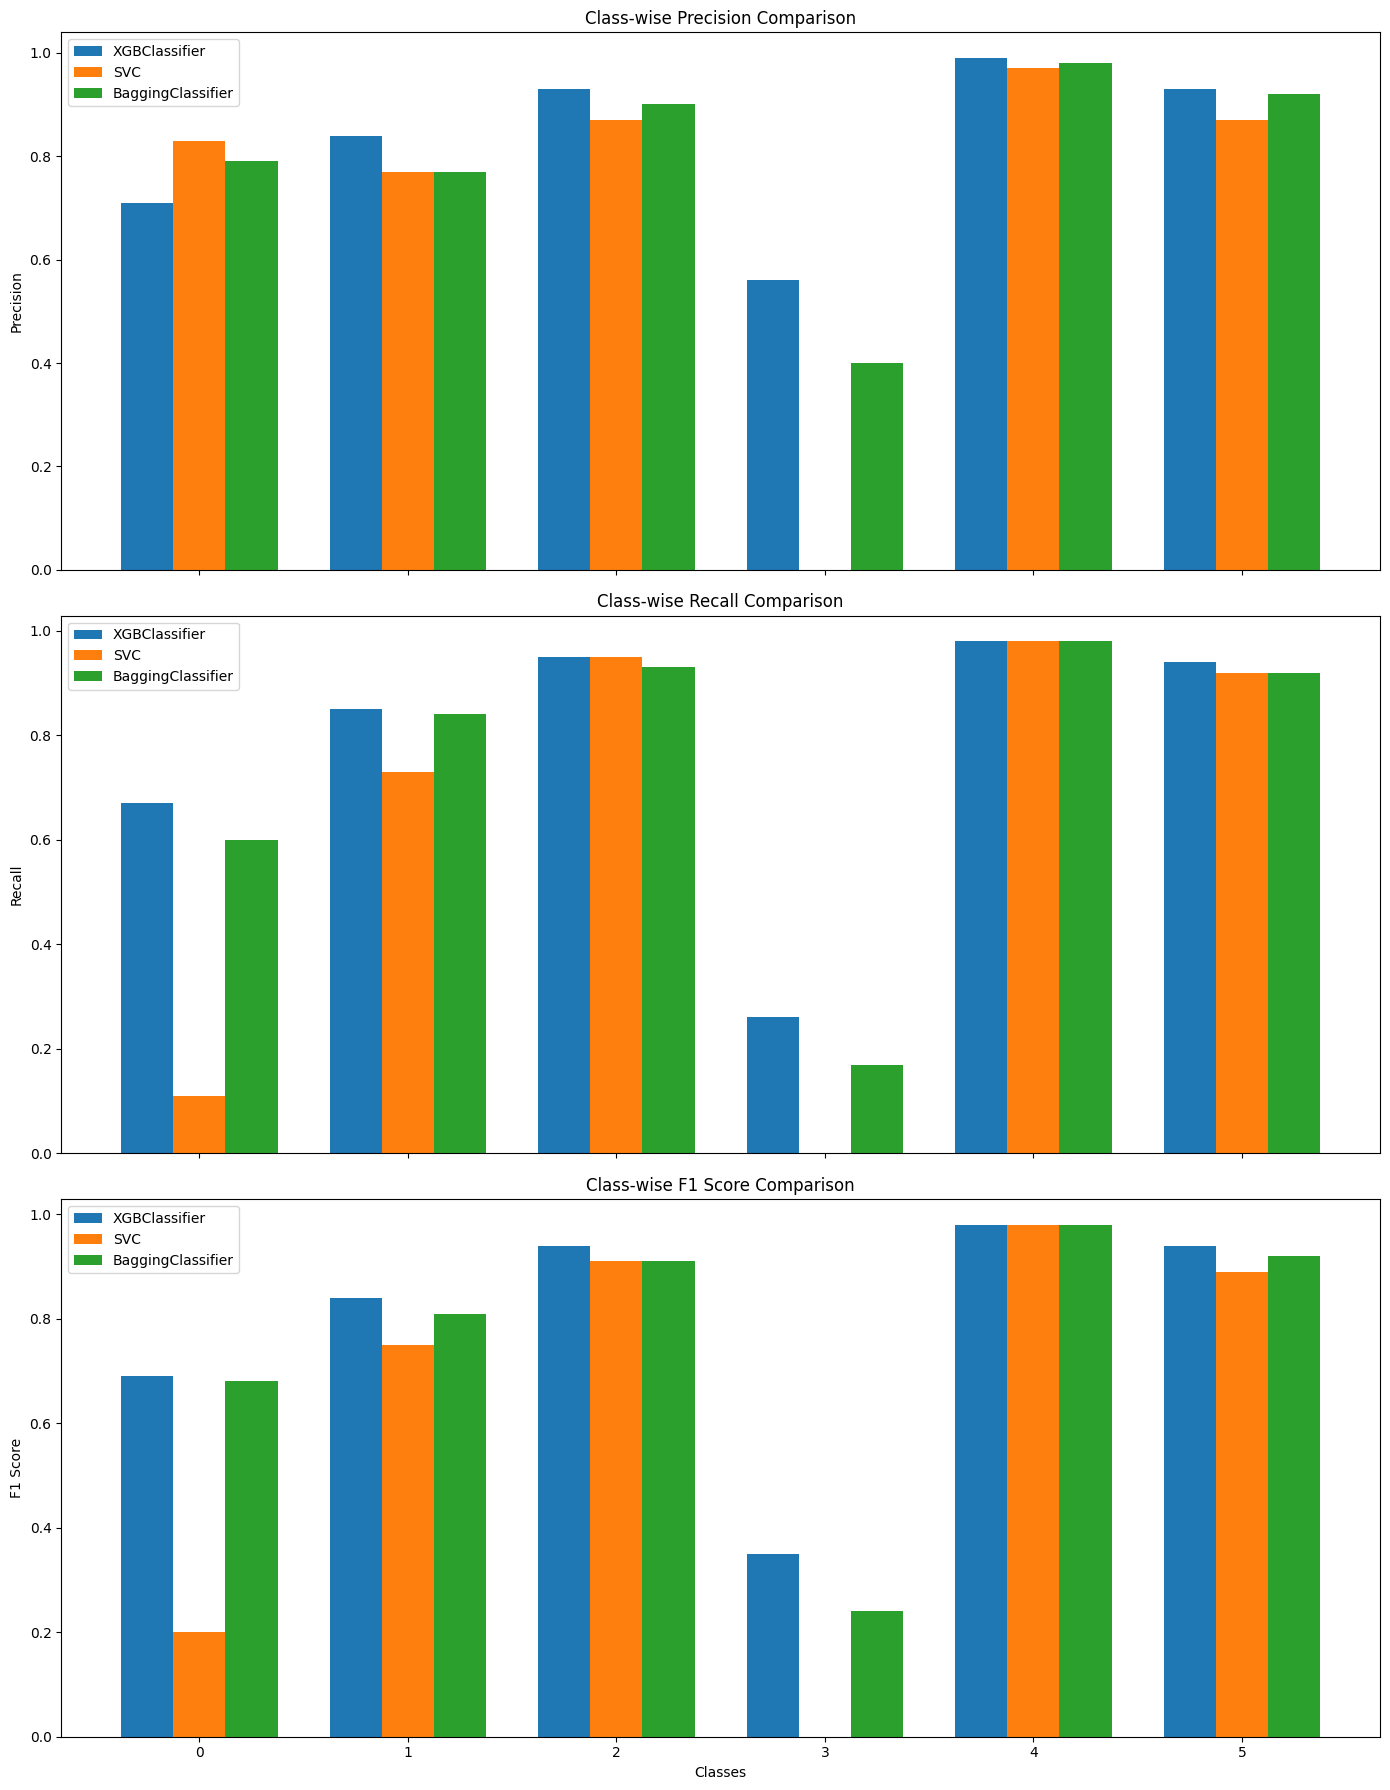

In [58]:
classes = ['0', '1', '2', '3', '4', '5']

precision = {
    'XGBClassifier': [0.71, 0.84, 0.93, 0.56, 0.99, 0.93],
    'SVC': [0.83, 0.77, 0.87, 0.00, 0.97, 0.87],
    'BaggingClassifier': [0.79, 0.77, 0.90, 0.40, 0.98, 0.92]
}

recall = {
    'XGBClassifier': [0.67, 0.85, 0.95, 0.26, 0.98, 0.94],
    'SVC': [0.11, 0.73, 0.95, 0.00, 0.98, 0.92],
    'BaggingClassifier': [0.60, 0.84, 0.93, 0.17, 0.98, 0.92]
}

f1_score = {
    'XGBClassifier': [0.69, 0.84, 0.94, 0.35, 0.98, 0.94],
    'SVC': [0.20, 0.75, 0.91, 0.00, 0.98, 0.89],
    'BaggingClassifier': [0.68, 0.81, 0.91, 0.24, 0.98, 0.92]
}

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

for i, (model, scores) in enumerate(precision.items()):
    ax[0].bar(x + i * width - width, scores, width, label=model)

ax[0].set_ylabel('Precision')
ax[0].set_title('Class-wise Precision Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(classes)
ax[0].legend()

for i, (model, scores) in enumerate(recall.items()):
    ax[1].bar(x + i * width - width, scores, width, label=model)

ax[1].set_ylabel('Recall')
ax[1].set_title('Class-wise Recall Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classes)
ax[1].legend()

for i, (model, scores) in enumerate(f1_score.items()):
    ax[2].bar(x + i * width - width, scores, width, label=model)

ax[2].set_ylabel('F1 Score')
ax[2].set_title('Class-wise F1 Score Comparison')
ax[2].set_xticks(x)
ax[2].set_xticklabels(classes)
ax[2].legend()

plt.xlabel('Classes')
plt.tight_layout()
plt.show()


The XGBClassifier model has the highest overall accuracy, indicating it performs better on the dataset compared to SVC and BaggingClassifier.
* XGBClassifier is giving generally high precision across classes, especially for class 4 and class 5.
* SVC is giving lower precision for class 0 and class 3, but reasonable precision for other classes.
* BaggingClassifier give slightly lower precision than XGBClassifier, but better than SVC for some classes.


***Based on this, XGBClassifier would be the preffered model if the goal is to achieve the highest overall performance.***

# Preparing Submission File

In [59]:
test_data_transformed = transformer.transform(test_data)

In [60]:
test_pred = xgb_model.predict(test_data_transformed)

In [61]:
test_pred_decode = le.inverse_transform(test_pred)

In [62]:
submission = pd.DataFrame({
    "ID": test_data.index +1,
    "Crime_Category":test_pred_decode
})
submission.to_csv('submission.csv', index=False)

In [63]:
submission.shape

(5000, 2)